In [1]:
import pandas as pd
import numpy as np
import sklearn.datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [68]:
data = pd.read_csv("/Users/saudahmad/Desktop/DL/weather_data.csv")

In [69]:
# data

In [70]:
# data.info()
# data.describe()
# data.isnull().sum()
data.dropna(inplace=True)

In [71]:
labels = data['Precip Type']
data = data.drop(columns = ['Formatted Date','Summary','Daily Summary','Precip Type'])

In [72]:
data.columns.nunique()

8

In [73]:
# labels.unique()
from sklearn.preprocessing import LabelEncoder

# Using LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(labels)

array([0, 0, 0, ..., 0, 0, 0])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95936 entries, 0 to 96452
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Temperature (C)           95936 non-null  float64
 1   Apparent Temperature (C)  95936 non-null  float64
 2   Humidity                  95936 non-null  float64
 3   Wind Speed (km/h)         95936 non-null  float64
 4   Wind Bearing (degrees)    95936 non-null  float64
 5   Visibility (km)           95936 non-null  float64
 6   Loud Cover                95936 non-null  float64
 7   Pressure (millibars)      95936 non-null  float64
dtypes: float64(8)
memory usage: 8.6 MB


In [80]:
X_train, X_test, Y_train, Y_test =train_test_split(data,labels, test_size=0.2, random_state=2)

In [81]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(76748, 8) (19188, 8) (76748,) (19188,)


In [83]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [84]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape = (8,)),
                          keras.layers.Dense(100,activation = 'relu'),
                          keras.layers.Dense(200,activation = 'sigmoid'),
                          keras.layers.Dense(100,activation = 'relu'),
                          keras.layers.Dense(2,activation  = 'sigmoid')
])

In [85]:
#compiling the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


In [86]:
history = model.fit(std_train, Y_train, validation_split=0.1, epochs=20)

Epoch 1/20
2159/2159 [==============================] - 4s 2ms/step - loss: 0.0428 - accuracy: 0.9824 - val_loss: 0.0191 - val_accuracy: 0.9904
Epoch 2/20
2159/2159 [==============================] - 3s 1ms/step - loss: 0.0245 - accuracy: 0.9886 - val_loss: 0.0271 - val_accuracy: 0.9857
Epoch 3/20
2159/2159 [==============================] - 3s 2ms/step - loss: 0.0216 - accuracy: 0.9898 - val_loss: 0.0250 - val_accuracy: 0.9874
Epoch 4/20
2159/2159 [==============================] - 3s 2ms/step - loss: 0.0211 - accuracy: 0.9901 - val_loss: 0.0206 - val_accuracy: 0.9894
Epoch 5/20
2159/2159 [==============================] - 3s 1ms/step - loss: 0.0210 - accuracy: 0.9900 - val_loss: 0.0168 - val_accuracy: 0.9917
Epoch 6/20
2159/2159 [==============================] - 3s 1ms/step - loss: 0.0200 - accuracy: 0.9908 - val_loss: 0.0155 - val_accuracy: 0.9943
Epoch 7/20
2159/2159 [==============================] - 4s 2ms/step - loss: 0.0199 - accuracy: 0.9909 - val_loss: 0.0150 - val_accuracy:

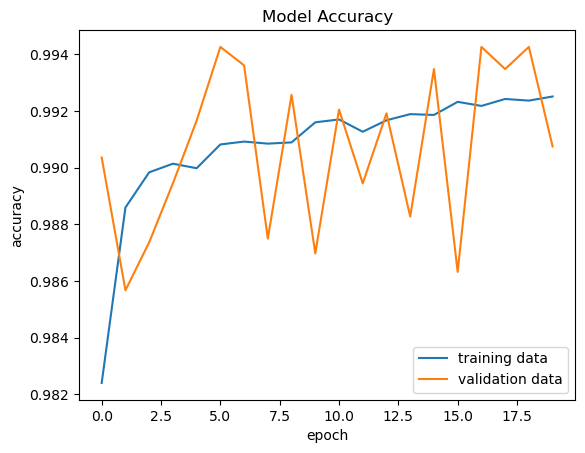

In [87]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data','validation data'], loc = 'lower right')

In [88]:
scaler = StandardScaler()
std_train = scaler.fit_transform(X_train)
std_test = scaler.transform(X_test)

In [89]:
history = model.fit(std_train, Y_train, validation_split=0.1, epochs=20)

Epoch 1/20
2159/2159 [==============================] - 4s 2ms/step - loss: 0.0160 - accuracy: 0.9924 - val_loss: 0.0144 - val_accuracy: 0.9935
Epoch 2/20
2159/2159 [==============================] - 3s 1ms/step - loss: 0.0164 - accuracy: 0.9923 - val_loss: 0.0147 - val_accuracy: 0.9932
Epoch 3/20
2159/2159 [==============================] - 3s 1ms/step - loss: 0.0151 - accuracy: 0.9931 - val_loss: 0.0199 - val_accuracy: 0.9900
Epoch 4/20
2159/2159 [==============================] - 4s 2ms/step - loss: 0.0156 - accuracy: 0.9925 - val_loss: 0.0156 - val_accuracy: 0.9930
Epoch 5/20
2159/2159 [==============================] - 4s 2ms/step - loss: 0.0158 - accuracy: 0.9925 - val_loss: 0.0133 - val_accuracy: 0.9934
Epoch 6/20
2159/2159 [==============================] - 5s 2ms/step - loss: 0.0155 - accuracy: 0.9926 - val_loss: 0.0132 - val_accuracy: 0.9936
Epoch 7/20
2159/2159 [==============================] - 4s 2ms/step - loss: 0.0158 - accuracy: 0.9923 - val_loss: 0.0212 - val_accuracy:

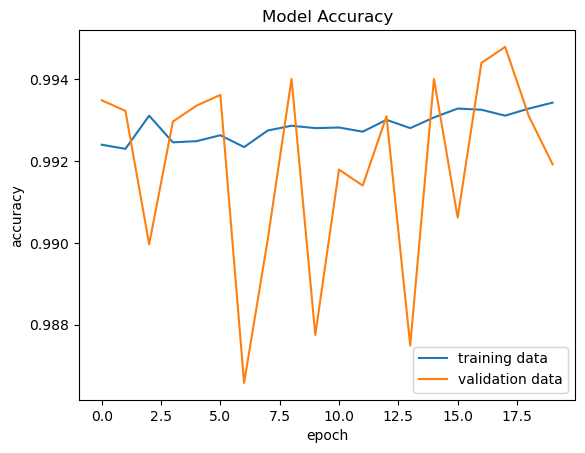

In [90]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data','validation data'], loc = 'lower right')

In [91]:
# Accuracy on test data
loss, accuracy = model.evaluate(std_test,Y_test)

600/600 [==============================] - 1s 878us/step - loss: 0.0160 - accuracy: 0.9919


In [92]:
m_predict =model.predict(std_test)

600/600 [==============================] - 1s 862us/step


In [102]:


labels[81285]

1

In [100]:
print(m_predict[1])

[0.04107388 0.9814427 ]
